[Reference1](https://pub.towardsai.net/rocket-fast-and-accurate-time-series-classification-f54923ad0ac9) <br>
[Reference2](https://colab.research.google.com/github/jainds/practical-ai/blob/master/_notebooks/2020-07-24-Random-convolutional-kernel-transform.ipynb)

In [4]:
pip install sktime

In [9]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)

0.08661467760556908

In [10]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9245283018867925

In [12]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sktime.datasets import load_arrow_head  # univariate dataset
from sktime.transformations.panel.rocket import Rocket

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [13]:
X_train, y_train = load_arrow_head(split="test", return_X_y=True)
X_test, y_test = load_arrow_head(split="train", return_X_y=True)
print(X_train.shape, X_test.shape) 

(175, 1) (36, 1)


In [14]:
rocket = Rocket(num_kernels=10000, random_state=111) 
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)
X_train_transform.shape

(175, 20000)

In [15]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
classifier.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [16]:
X_test_transform = rocket.transform(X_test)
classifier.score(X_test_transform, y_test)

0.9166666666666666

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae0b50ddd0>)

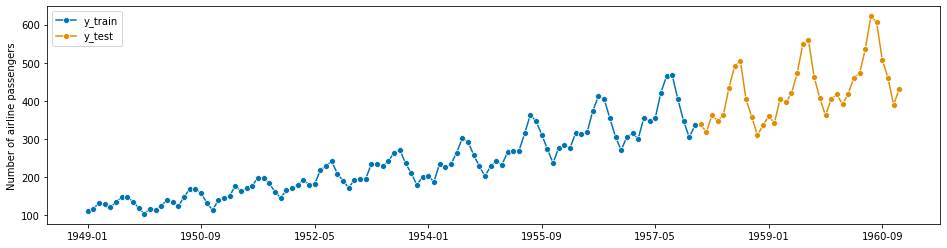

In [22]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [23]:
from sktime.forecasting.naive import NaiveForecaster

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

naive_forecaster_seasonal = NaiveForecaster(strategy="seasonal_last", sp=12)
naive_forecaster_seasonal.fit(y_train)
y_seasonal_last = naive_forecaster_seasonal.predict(fh)

plot_ys(y_train, y_test, y_last, y_seasonal_last, labels=["y_train", "y_test", "y_pred_last", "y_pred_seasonal_last"]);
smape_loss(y_last, y_test)

ValueError: ignored

In [24]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss

regressor = RandomForestRegressor()
forecaster = ReducedRegressionForecaster(regressor, window_length=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

plot_ys(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
smape_loss(y_test, y_pred)

ImportError: ignored

In [26]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 4.0MB/s 


In [30]:
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import smape_loss

forecaster = AutoARIMA(sp=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

ImportError: ignored

In [29]:
from sktime.datasets import load_arrow_head
from sktime.classification.compose import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

ImportError: ignored